# Zestaw zadań: Kwadratury
## Zadanie 1,2
### Autor: Artur Gęsiarz

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps
from warnings import filterwarnings
from scipy.special import roots_legendre

In [100]:
filterwarnings("ignore", category=DeprecationWarning)

### Funkcja do calkowania

In [101]:
def function_to_integrate(x):
    return 4 / (1 + x ** 2)

### Funkcja obliczajca wartosc pi za pomoca calki

In [102]:
def calculate_pi_integral(method, x, y):
    integral_value = method(y, x)
    return integral_value

### Funkcja obliczajca blad wzgledny

In [103]:
def relative_error(excat, approx):
    return np.abs((excat - approx) / excat)

### Funkcja metody prostokątów

In [104]:
def open_rectangle_rule(f, a, b, n):
    h = (b - a) / (2 * n)
    x = np.linspace(a + h, b - h, n)
    integral = 2 * h * np.sum(f(x))
    return integral

### Funkcja metody Gaussa-Legendre'a

In [105]:
def gauss_legendre_integration(n):
    nodes, weights = roots_legendre(n)

    x = 0.5 * (nodes + 1)
    w = 0.5 * weights

    integral_value = np.sum(w * function_to_integrate(x))

    return integral_value

### Lista do przechowywania bledow wzglednych dla kazdej z metod

In [106]:
errors_trapezoidal = []
errors_simpson = []
errors_open_rectangle = []
errors_legendre = []

### Przedzial calkowania

In [107]:
a = 0
b = 1

### Zakres wartosci m

In [108]:
exact_value = np.pi
m_values = np.arange(1, 26)
n_values = range(1, 100)

### Pętla po wartosciach m w celu obliczenia bledow kwadrator prostokatow, trapezow oraz Simpsona

In [109]:
for m in m_values:
    # Generowanie węzlów
    x = np.linspace(a, b, 2 ** m + 1)
    y = function_to_integrate(x)

    integral_trapezoidal = calculate_pi_integral(trapz, x, y)
    integral_simpson = calculate_pi_integral(simps, x, y)
    integral_open_rectangle = open_rectangle_rule(function_to_integrate, 0, 1, m)

    error_trapezoidal = relative_error(exact_value, integral_trapezoidal)
    error_simpson = relative_error(exact_value, integral_simpson)
    error_open_rectangle = relative_error(exact_value, integral_open_rectangle)

    errors_simpson.append(error_simpson)
    errors_trapezoidal.append(error_trapezoidal)
    errors_open_rectangle.append(error_open_rectangle)

### Petla po wartosc n w celu obliczenia bledow kwadratury Lagrangea

In [110]:
for n in n_values:
    integral_value = gauss_legendre_integration(n)
    error = np.abs((exact_value - integral_value) / exact_value)
    errors_legendre.append(error)

### Tworzenie wykresu

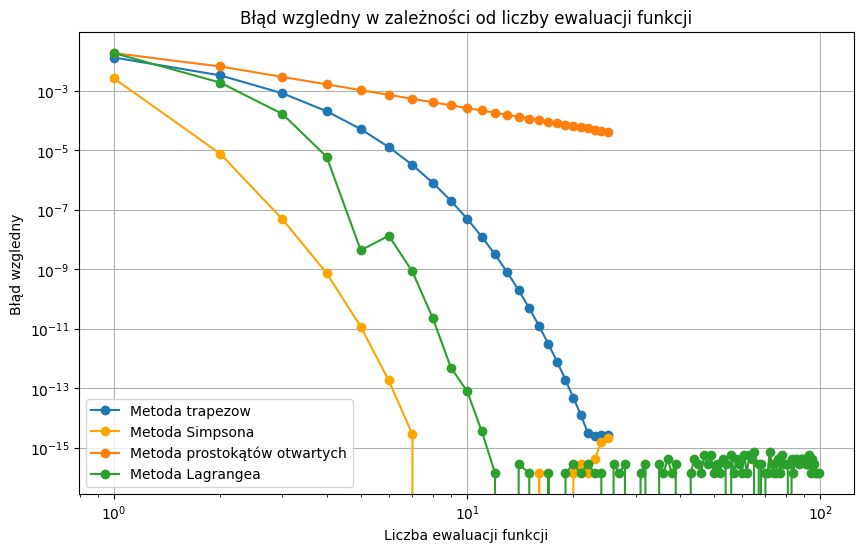

In [111]:
plt.figure(figsize=(10,6))
plt.plot(m_values, errors_trapezoidal, label='Metoda trapezow', marker='o')
plt.plot(m_values, errors_simpson, label='Metoda Simpsona', marker='o',color='orange')
plt.plot(m_values, errors_open_rectangle, label='Metoda prostokątów otwartych', marker='o')
plt.plot(n_values, errors_legendre, label='Metoda Lagrangea', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Błąd wzgledny w zależności od liczby ewaluacji funkcji')
plt.xlabel('Liczba ewaluacji funkcji')
plt.ylabel('Błąd wzgledny')
plt.legend()
plt.grid(True)
plt.show()

### Wyświetlanie danych

In [112]:
m = 1
for error_trapezional in errors_trapezoidal:
    #print(f"Error trapezional for {m} -> equals: {error_trapezional}")
    m += 1

m = 1
for error_simpson in errors_simpson:
    #print(f"Error Simpson for {m} -> equals: {error_simpson}")
    m += 1

### Obliczenie h_min

In [113]:
def calculate_hmin(method):
    h = 1.0
    previous_error = 1.0

    while True:
        x = np.linspace(0, 1, int(1 / h) + 1)
        y = function_to_integrate(x)

        exact_value = np.pi
        integral_value = method(y, x)
        error = relative_error(exact_value, integral_value)

        if error >= previous_error or np.isnan(error):
            break

        previous_error = error
        h /= 2

    return h

### Obliczenie wartości ponizęj ktorej zmniejsze kroku h nie zmniejsza juz bledu kwadratury dla metody trapezow

In [114]:
h_min_trapezoidal = calculate_hmin(trapz)
print("H_min dla metody trapezow wynosi:",h_min_trapezoidal)

H_min dla metody trapezow wynosi: 5.960464477539063e-08


### Obliczenie wartości ponizęj ktorej zmniejsze kroku h nie zmniejsza juz bledu kwadratury dla metody Simpsona

In [115]:
h_min_Simpson = calculate_hmin(simps)
print("H_min dla metody Simpsona wynosi:",h_min_Simpson)

H_min dla metody Simpsona wynosi: 0.001953125


### Obliczenie błędu numerycznego dladanej metody i wartości h

In [117]:
def calculate_error(method, h):
    x = np.linspace(0, 1, int(1 / h) + 1)
    y = function_to_integrate(x)

    exact_value = np.pi
    integral_value = method(y, x)

    error = np.abs((exact_value - integral_value) / exact_value)

    return error

### Obliczanie rzędu zbieżności

In [118]:
def calculate_convergence_order(errors, hs):
    p_values = []

    for i in range(len(errors) - 1):
        if errors[i] == 0 or errors[i+1] == 0:
            continue
        p = np.log(errors[i+1] / errors[i]) / np.log(hs[i+1] / hs[i])
        p_values.append(p)

    return p_values

### Zakres wartosci h

In [119]:
hs = np.logspace(-5, -1, 100)

### Obliczenie błędów numerycznych dla każdej metody

In [120]:
errors_trapezoidal_empi = [calculate_error(trapz, h) for h in hs]
errors_simpson_empi = [calculate_error(simps, h) for h in hs]

### Obliczenie rzędu zbieżności dla kazej metody

In [121]:
p_values_trapezoidal = calculate_convergence_order(errors_trapezoidal_empi, hs)
p_values_Simpson = calculate_convergence_order(errors_simpson_empi, hs)

### Wyświetlanie wynikow

In [122]:
print("Rząd zbieznosci dla metody trapezów: ",np.mean(p_values_trapezoidal))
print("Rząd zbieznosci dla metody Simpsona: ",np.mean(p_values_Simpson))

Rząd zbieznosci dla metody trapezów:  1.999999861768364
Rząd zbieznosci dla metody Simpsona:  3.0734249145794035
